In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
from scipy import signal
from PIL import Image

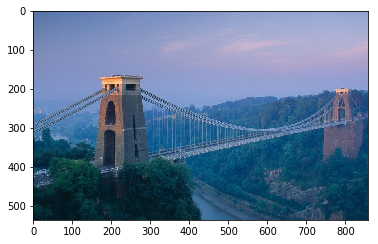

In [2]:
img = Image.open('bridge.jpg')
# img = Image.open('Lenna.png')


# img = np.array(img)
# h, w = img.shape
plt.imshow(img)

blocksize = 64
pos_x, pos_y = 250, 200
# pos_x, pos_y = 0, 0
block = img.crop((pos_x, pos_y, pos_x + 64, pos_y + 64))
block = np.array(block)

In [3]:
message = np.array([1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1,
                    0, 0, 1, 1, 1, 1, 1, 1,
                    0, 0, 0, 0, 1, 1, 1, 1,
                    0, 0, 0, 0, 0, 1, 1, 1,
                    0, 0, 0, 0, 0, 0, 1, 1,
                    0, 0, 0, 0, 0, 1, 1, 1])

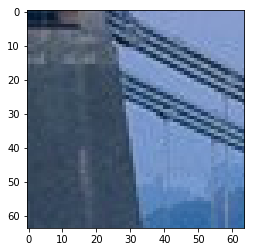

In [4]:
plt.imshow(block)

In [9]:
def insert_message(image, message, L=0.7):
    bs = image.shape[0] # image size
    k = 0
    padding = 2
    for i in range(padding, bs - padding, 2*padding):
        for j in range(padding, bs - padding, 2*padding):
            print(i, '\t', j, '\t', k)
            Y = int(np.round(0.3*image[i][j][0] + 0.59*image[i][j][1] + 0.11*image[i][j][2]))
#             print(0.3*image[i][j][0] + 0.59*image[i][j][1] + 0.11*image[i][j][2], Y)
            if message[k] == 0:
                image[i][j][2] -= L * Y
            elif message[k] == 1:
                image[i][j][2] += L * Y
            k += 1
    return image

In [10]:
block_with_message = insert_message(block, message, L=0.1)

2 	 2 	 0
2 	 6 	 1
2 	 10 	 2
2 	 14 	 3
2 	 18 	 4
2 	 22 	 5
2 	 26 	 6
2 	 30 	 7
2 	 34 	 8
2 	 38 	 9
2 	 42 	 10
2 	 46 	 11
2 	 50 	 12
2 	 54 	 13
2 	 58 	 14
6 	 2 	 15
6 	 6 	 16
6 	 10 	 17
6 	 14 	 18
6 	 18 	 19
6 	 22 	 20
6 	 26 	 21
6 	 30 	 22
6 	 34 	 23
6 	 38 	 24
6 	 42 	 25
6 	 46 	 26
6 	 50 	 27
6 	 54 	 28
6 	 58 	 29
10 	 2 	 30
10 	 6 	 31
10 	 10 	 32
10 	 14 	 33
10 	 18 	 34
10 	 22 	 35
10 	 26 	 36
10 	 30 	 37
10 	 34 	 38
10 	 38 	 39
10 	 42 	 40
10 	 46 	 41
10 	 50 	 42
10 	 54 	 43
10 	 58 	 44
14 	 2 	 45
14 	 6 	 46
14 	 10 	 47
14 	 14 	 48
14 	 18 	 49
14 	 22 	 50
14 	 26 	 51
14 	 30 	 52
14 	 34 	 53
14 	 38 	 54
14 	 42 	 55
14 	 46 	 56
14 	 50 	 57
14 	 54 	 58
14 	 58 	 59
18 	 2 	 60
18 	 6 	 61
18 	 10 	 62
18 	 14 	 63
18 	 18 	 64


IndexError: index 64 is out of bounds for axis 0 with size 64

In [ ]:
plt.imshow(block_with_message)
# block_with_message[4]

In [ ]:
def extract_message(image, sigma=2):
    bs = image.shape[0]
    message = np.zeros(64)
    k = 0
    for y in range(0, bs, 8):
        for x in range(0, bs, 8):
            B_hat = 0
            for s in range(1, sigma + 1):
                
                
                if y == 0 and x == 0:
                    print(image[image[y-s]], image[x-s])
                
                
                B_hat += image[y + s][x][2] + image[y-s][x][2] + image[y][x+s][2] + image[y][x-s][2]
#                 print(image[y + s][x][2], image[y-s][x][2], image[y][x+s][2], image[y][x-s][2])
            B_hat /= 4*sigma
            print(B_hat, '\t', image[y][x][2])
            if image[y][x][2] > B_hat:
                message[k] = 1
            elif image[y][x][2] < B_hat:
                message[k] = 0
            k += 1
    return message

In [ ]:
extracted_message = extract_message(block_with_message)
print(message.reshape(8,8))
print(extracted_message.reshape(8,8))
print((message == extracted_message).reshape(8,8))

In [7]:
padding = 2
np.array(range(padding, 64 - padding - 1, 8)).shape

(8,)

In [ ]:
range(2)